### Indice

- [Grafo](#Grafo)
- [Motif](#Motif)
- [Rinomina](#Rinomina)
- [Identify](#Identify)
- [Zippa](#Zippa)
- [Pipeline gerarchica multicompressione](#Pipeline-gerarchica-multicompressione)
- [Procedura frattale](#Procedura-frattale)
- [Memorizza merge](#Memorizza-merge)
- [Indici](#Indici)

In [3]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict
from pathlib import Path

In [4]:
G1 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\insecta-ant-colony6-day30.edges')

G2 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\aves-wildbird-network-1.edges')

G3 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\mammalia-dolphin-florida-overall.edges') 

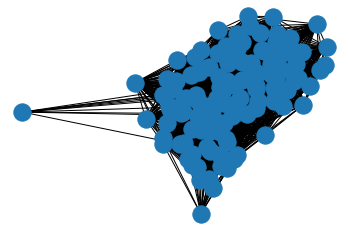

In [5]:
G1 = nx.read_weighted_edgelist(G1)
nx.draw_networkx(G1, with_labels=False)
plt.axis('off')
plt.show()

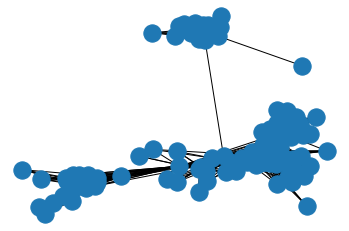

In [16]:
G2 = nx.read_weighted_edgelist(G2)
nx.draw_networkx(G2, with_labels=False)
plt.axis('off')
plt.show()

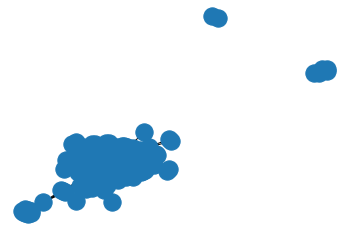

In [17]:
G3 = nx.read_weighted_edgelist(G3)
nx.draw_networkx(G3, with_labels=False)
plt.axis('off')
plt.show()

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

### Grafo 
[torna su](#Indice)

Grafo test di base `G`

### Motif 
[torna su](#Indice)

Sottografo `motif`

In [6]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

### Rinomina 
[torna su](#Indice)

Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [7]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

### Identify
[torna su](#Indice)

Identify `motif` in `G`

In [8]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

### Zippa
[torna su](#Indice)

Restituisce il mapping per la compressione

In [9]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

### Pipeline gerarchica multicompressione
[torna su](#Indice)

_versione livelli misti, non frattale_

Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [10]:
G0 = rinomina(G1)

In [18]:
G2 = rinomina(G2)

In [19]:
G3 = rinomina(G3)

In [11]:
def multicoll(G, motif):
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            print(mapping)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return res


In [12]:
res = multicoll(G0, motif)

{(0, '1'): (1, '1'), (0, '10'): (1, '1'), (0, '100'): (1, '1'), (0, '101'): (0, '101'), (0, '102'): (0, '102'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '111'): (0, '111'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '117'): (0, '117'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '121'): (0, '121'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '131'): (0, '131'), (0, '133'): (0, '133'), (0, '135'): (0, '135'), (0, '140'): (0, '140'), (0, '143'): (0, '143'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '154'): (0, '154'), (0, '155'): (0, '155'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (0, '111'): (1, '111'), (0, '113'): (1, '111'), (0, '114'): (1, '111'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '121'): (0, '121'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '131'): (0, '131'), (0, '133'): (0, '133'), (0, '135'): (0, '135'), (0, '140'): (0, '140'), (0, '143'): (0, '143'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '154'): (0, '154'), (0, '155'): (0, '155'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (0, '16'): (0, '16'), (0, '160'): (0, '160'), (0, '161'): (0, '161'), (0, '162'): (0, '162'), (0, '164'): (0, '164'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (1, '111'): (1, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (0, '128'): (1, '128'), (0, '13'): (1, '128'), (0, '131'): (1, '128'), (0, '135'): (0, '135'), (0, '140'): (0, '140'), (0, '143'): (0, '143'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '154'): (0, '154'), (0, '155'): (0, '155'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (0, '16'): (0, '16'), (0, '160'): (0, '160'), (0, '161'): (0, '161'), (0, '162'): (0, '162'), (0, '164'): (0, '164'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '21'): (0, '21'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (1, '111'): (1, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (1, '128'): (1, '128'), (1, '135'): (1, '135'), (1, '143'): (1, '143'), (1, '147'): (1, '147'), (0, '151'): (1, '151'), (0, '153'): (1, '151'), (0, '154'): (0, '154'), (0, '155'): (0, '155'), (0, '157'): (0, '157'), (0, '158'): (1, '151'), (0, '159'): (0, '159'), (0, '16'): (0, '16'), (0, '160'): (0, '160'), (0, '161'): (0, '161'), (0, '162'): (0, '162'), (0, '164'): (0, '164'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '21'): (0, '21'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '39'): (0, '39'), (0, '4'): (0, '

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (1, '111'): (1, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (1, '128'): (1, '128'), (1, '135'): (1, '135'), (1, '143'): (1, '143'), (1, '147'): (1, '147'), (1, '151'): (1, '151'), (1, '154'): (1, '154'), (1, '157'): (1, '157'), (1, '160'): (1, '160'), (1, '164'): (1, '164'), (0, '2'): (1, '2'), (0, '21'): (0, '21'), (0, '22'): (1, '2'), (0, '24'): (0, '24'), (0, '26'): (1, '2'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): 

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (1, '111'): (1, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (1, '128'): (1, '128'), (1, '135'): (1, '135'), (1, '143'): (1, '143'), (1, '147'): (1, '147'), (1, '151'): (1, '151'), (1, '154'): (1, '154'), (1, '157'): (1, '157'), (1, '160'): (1, '160'), (1, '164'): (1, '164'), (1, '2'): (1, '2'), (1, '21'): (1, '21'), (1, '24'): (1, '24'), (1, '31'): (1, '31'), (1, '35'): (1, '35'), (0, '37'): (1, '37'), (0, '39'): (0, '39'), (0, '4'): (1, '37'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (1, '37'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '62'): (0, '62'), (0, '64'): (0, '64'), (0, '65'

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (1, '111'): (1, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (1, '128'): (1, '128'), (1, '135'): (1, '135'), (1, '143'): (1, '143'), (1, '147'): (1, '147'), (1, '151'): (1, '151'), (1, '154'): (1, '154'), (1, '157'): (1, '157'), (1, '160'): (1, '160'), (1, '164'): (1, '164'), (1, '2'): (1, '2'), (1, '21'): (1, '21'), (1, '24'): (1, '24'), (1, '31'): (1, '31'), (1, '35'): (1, '35'), (1, '37'): (1, '37'), (1, '39'): (1, '39'), (1, '45'): (1, '45'), (1, '5'): (1, '5'), (1, '52'): (1, '52'), (1, '56'): (1, '56'), (0, '58'): (1, '58'), (0, '59'): (0, '59'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '65'): (1, '58'), (0, '66'): (0, '66'), (0, '67'): (0, '67'), (0, '68'): (0, '68'), (0, '69'): (0, '69'), (0, '70'): (0, '70'), (0, '71'): (1, '58'), (0, '73'): (0, '73'), (0, '74'): (0, '74'), (0, '75'): (0, '75'), (0, '76'): (0, '76'), (0, '77'): (0, '77'), (0, '78

{(1, '1'): (1, '1'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '105'): (1, '105'), (2, '111'): (2, '111'), (1, '119'): (1, '119'), (1, '123'): (1, '123'), (1, '124'): (1, '124'), (1, '128'): (1, '128'), (1, '135'): (1, '135'), (1, '143'): (1, '143'), (1, '147'): (1, '147'), (1, '151'): (1, '151'), (1, '154'): (1, '154'), (1, '157'): (1, '157'), (1, '160'): (1, '160'), (1, '164'): (1, '164'), (1, '2'): (1, '2'), (1, '21'): (1, '21'), (1, '24'): (1, '24'), (1, '31'): (1, '31'), (1, '35'): (1, '35'), (1, '37'): (1, '37'), (1, '39'): (1, '39'), (1, '45'): (1, '45'), (1, '5'): (1, '5'), (1, '52'): (1, '52'), (1, '56'): (1, '56'), (1, '58'): (1, '58'), (1, '6'): (1, '6'), (1, '60'): (1, '60'), (1, '70'): (1, '70'), (1, '74'): (1, '74'), (1, '77'): (1, '77'), (0, '78'): (1, '78'), (0, '81'): (1, '78'), (0, '85'): (1, '78'), (0, '86'): (0, '86'), (0, '87'): (0, '87'), (0, '88'): (0, '88'), (0, '89'): (0, '89'), (0, '9'): (0, '9'), (0, '91'): (0, '91'), (0, '94'): (0, '94'), (0, '96')

{(2, '1'): (2, '1'), (2, '101'): (2, '101'), (2, '111'): (2, '111'), (2, '119'): (2, '119'), (2, '128'): (2, '128'), (2, '147'): (2, '147'), (2, '157'): (2, '157'), (2, '2'): (2, '2'), (1, '31'): (2, '31'), (1, '35'): (2, '31'), (1, '37'): (2, '31'), (1, '39'): (1, '39'), (1, '45'): (1, '45'), (1, '5'): (1, '5'), (1, '52'): (1, '52'), (1, '56'): (1, '56'), (1, '58'): (1, '58'), (1, '6'): (1, '6'), (1, '60'): (1, '60'), (1, '70'): (1, '70'), (1, '74'): (1, '74'), (1, '77'): (1, '77'), (1, '78'): (1, '78'), (1, '86'): (1, '86'), (1, '89'): (1, '89'), (1, '94'): (1, '94')}
{(2, '1'): (2, '1'), (2, '101'): (2, '101'), (2, '111'): (2, '111'), (2, '119'): (2, '119'), (2, '128'): (2, '128'), (2, '147'): (2, '147'), (2, '157'): (2, '157'), (2, '2'): (2, '2'), (2, '31'): (2, '31'), (1, '39'): (2, '39'), (1, '45'): (2, '39'), (1, '5'): (2, '39'), (1, '52'): (1, '52'), (1, '56'): (1, '56'), (1, '58'): (1, '58'), (1, '6'): (1, '6'), (1, '60'): (1, '60'), (1, '70'): (1, '70'), (1, '74'): (1, '74'),

In [13]:
res

[(0,
  (118,
   [(0, '1'),
    (0, '10'),
    (0, '100'),
    (0, '101'),
    (0, '102'),
    (0, '104'),
    (0, '105'),
    (0, '107'),
    (0, '108'),
    (0, '109'),
    (0, '11'),
    (0, '111'),
    (0, '113'),
    (0, '114'),
    (0, '117'),
    (0, '119'),
    (0, '12'),
    (0, '121'),
    (0, '123'),
    (0, '124'),
    (0, '125'),
    (0, '127'),
    (0, '128'),
    (0, '129'),
    (0, '13'),
    (0, '131'),
    (0, '133'),
    (0, '135'),
    (0, '140'),
    (0, '143'),
    (0, '146'),
    (0, '147'),
    (0, '148'),
    (0, '15'),
    (0, '150'),
    (0, '151'),
    (0, '152'),
    (0, '153'),
    (0, '154'),
    (0, '155'),
    (0, '157'),
    (0, '158'),
    (0, '159'),
    (0, '16'),
    (0, '160'),
    (0, '161'),
    (0, '162'),
    (0, '164'),
    (0, '17'),
    (0, '19'),
    (0, '2'),
    (0, '21'),
    (0, '22'),
    (0, '23'),
    (0, '24'),
    (0, '26'),
    (0, '27'),
    (0, '29'),
    (0, '3'),
    (0, '30'),
    (0, '31'),
    (0, '33'),
    (0, '34'),
    

In [45]:
# res = multicoll(G0, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2, 3, 4] 
# nodi:  [118, 60, 14, 6, 2] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '104'), (0, '105'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '111'), (0, '113'), (0, '114'), (0, '117'), (0, '119'), (0, '12'), (0, '121'), (0, '123'), (0, '124'), (0, '125'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '131'), (0, '133'), (0, '135'), (0, '140'), (0, '143'), (0, '146'), (0, '147'), (0, '148'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '164'), (0, '17'), (0, '19'), (0, '2'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '26'), (0, '27'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '39'), (0, '4'), (0, '40'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '56'), (0, '57

In [48]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  118 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '104'), (0, '105'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '111'), (0, '113'), (0, '114'), (0, '117'), (0, '119'), (0, '12'), (0, '121'), (0, '123'), (0, '124'), (0, '125'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '131'), (0, '133'), (0, '135'), (0, '140'), (0, '143'), (0, '146'), (0, '147'), (0, '148'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '164'), (0, '17'), (0, '19'), (0, '2'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '26'), (0, '27'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '39'), (0, '4'), (0, '40'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '

[((0, '1'), (0, '2')), ((0, '1'), (0, '4')), ((0, '1'), (0, '6')), ((0, '1'), (0, '60')), ((0, '1'), (0, '8')), ((0, '1'), (0, '9')), ((0, '1'), (0, '10')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '19')), ((0, '1'), (0, '21')), ((0, '1'), (0, '22')), ((0, '1'), (0, '23')), ((0, '1'), (0, '27')), ((0, '1'), (0, '3')), ((0, '1'), (0, '29')), ((0, '1'), (0, '30')), ((0, '1'), (0, '31')), ((0, '1'), (0, '143')), ((0, '1'), (0, '102')), ((0, '1'), (0, '35')), ((0, '1'), (0, '36')), ((0, '1'), (0, '39')), ((0, '1'), (0, '40')), ((0, '1'), (0, '45')), ((0, '1'), (0, '46')), ((0, '1'), (0, '48')), ((0, '1'), (0, '49')), ((0, '1'), (0, '50')), ((0, '1'), (0, '51')), ((0, '1'), (0, '53')), ((0, '1'), (0, '54')), ((0, '1'), (0, '151')), ((0, '1'), (0, '5')), ((0, '1'), (0, '57')), ((0, '1'), (0, '58')), ((0, '1'), (0, '146')), ((0, '1'), (0, '62')), ((0, '1'), (0, '64')), ((0, '1'), (0, '66')), ((0, '1'), (0

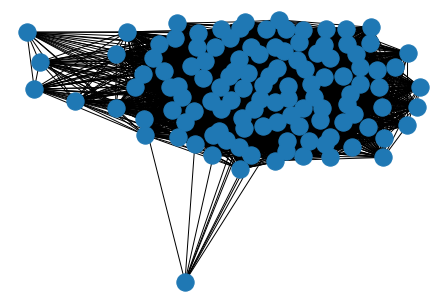

[((1, '1'), (1, '2')), ((1, '1'), (1, '37')), ((1, '1'), (0, '6')), ((1, '1'), (0, '60')), ((1, '1'), (0, '8')), ((1, '1'), (0, '9')), ((1, '1'), (1, '1')), ((1, '1'), (1, '119')), ((1, '1'), (1, '128')), ((1, '1'), (1, '143')), ((1, '1'), (1, '157')), ((1, '1'), (1, '164')), ((1, '1'), (1, '154')), ((1, '1'), (1, '21')), ((1, '1'), (1, '24')), ((1, '1'), (1, '31')), ((1, '1'), (1, '102')), ((1, '1'), (1, '35')), ((1, '1'), (1, '39')), ((1, '1'), (1, '45')), ((1, '1'), (1, '5')), ((1, '1'), (1, '52')), ((1, '1'), (1, '151')), ((1, '1'), (1, '58')), ((1, '1'), (1, '135')), ((1, '1'), (1, '56')), ((1, '1'), (0, '66')), ((1, '1'), (0, '67')), ((1, '1'), (0, '68')), ((1, '1'), (1, '147')), ((1, '1'), (0, '70')), ((1, '1'), (0, '73')), ((1, '1'), (0, '75')), ((1, '1'), (0, '76')), ((1, '1'), (0, '78')), ((1, '1'), (0, '80')), ((1, '1'), (0, '81')), ((1, '1'), (0, '82')), ((1, '1'), (0, '85')), ((1, '1'), (0, '86')), ((1, '1'), (0, '87')), ((1, '1'), (0, '88')), ((1, '1'), (0, '89')), ((1, '

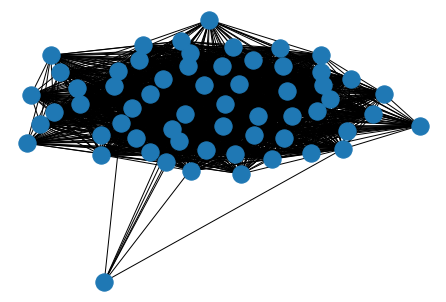

[((2, '1'), (2, '2')), ((2, '1'), (2, '31')), ((2, '1'), (2, '6')), ((2, '1'), (2, '74')), ((2, '1'), (2, '86')), ((2, '1'), (2, '1')), ((2, '1'), (2, '119')), ((2, '1'), (2, '128')), ((2, '1'), (2, '157')), ((2, '1'), (2, '147')), ((2, '1'), (2, '101')), ((2, '1'), (2, '39')), ((2, '1'), (2, '52')), ((2, '1'), (2, '111')), ((2, '2'), (2, '128')), ((2, '2'), (2, '6')), ((2, '2'), (2, '74')), ((2, '2'), (2, '119')), ((2, '2'), (2, '157')), ((2, '2'), (2, '147')), ((2, '2'), (2, '2')), ((2, '2'), (2, '31')), ((2, '2'), (2, '39')), ((2, '2'), (2, '52')), ((2, '2'), (2, '86')), ((2, '2'), (2, '111')), ((2, '2'), (2, '101')), ((2, '31'), (2, '119')), ((2, '31'), (2, '111')), ((2, '31'), (2, '74')), ((2, '31'), (2, '6')), ((2, '31'), (2, '147')), ((2, '31'), (2, '101')), ((2, '31'), (2, '52')), ((2, '31'), (2, '39')), ((2, '31'), (2, '31')), ((2, '31'), (2, '128')), ((2, '31'), (2, '157')), ((2, '31'), (2, '86')), ((2, '6'), (2, '39')), ((2, '6'), (2, '6')), ((2, '6'), (2, '147')), ((2, '6')

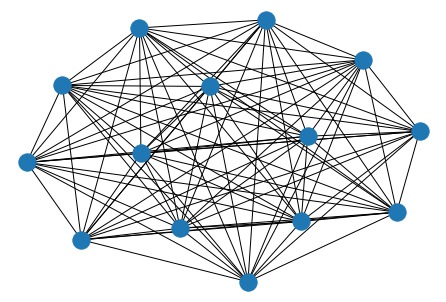

[((3, '1'), (3, '157')), ((3, '1'), (3, '39')), ((3, '1'), (2, '74')), ((3, '1'), (2, '86')), ((3, '1'), (3, '1')), ((3, '1'), (3, '119')), ((3, '157'), (3, '119')), ((3, '157'), (3, '39')), ((3, '157'), (2, '74')), ((3, '157'), (3, '157')), ((3, '157'), (2, '86')), ((3, '39'), (3, '39')), ((3, '39'), (3, '119')), ((3, '39'), (2, '74')), ((3, '39'), (2, '86')), ((2, '74'), (2, '86')), ((2, '74'), (3, '119')), ((2, '74'), (2, '74')), ((2, '86'), (3, '119')), ((2, '86'), (2, '86')), ((3, '119'), (3, '119'))]


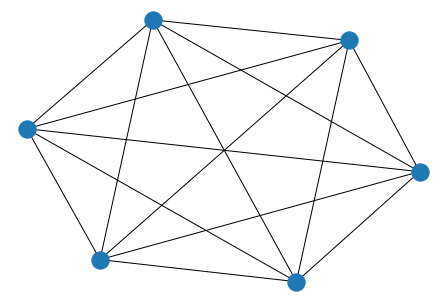

[((4, '1'), (4, '119')), ((4, '1'), (4, '1')), ((4, '119'), (4, '119'))]


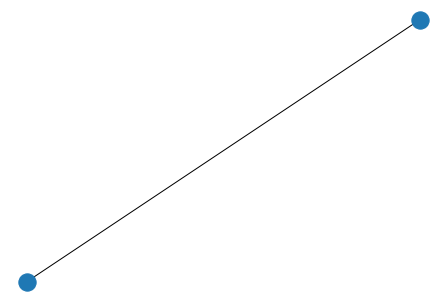

In [15]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

[((0, '1'), (0, '2')), ((0, '1'), (0, '4')), ((0, '1'), (0, '6')), ((0, '1'), (0, '60')), ((0, '1'), (0, '8')), ((0, '1'), (0, '9')), ((0, '1'), (0, '10')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '19')), ((0, '1'), (0, '21')), ((0, '1'), (0, '22')), ((0, '1'), (0, '23')), ((0, '1'), (0, '27')), ((0, '1'), (0, '3')), ((0, '1'), (0, '29')), ((0, '1'), (0, '30')), ((0, '1'), (0, '31')), ((0, '1'), (0, '143')), ((0, '1'), (0, '102')), ((0, '1'), (0, '35')), ((0, '1'), (0, '36')), ((0, '1'), (0, '39')), ((0, '1'), (0, '40')), ((0, '1'), (0, '45')), ((0, '1'), (0, '46')), ((0, '1'), (0, '48')), ((0, '1'), (0, '49')), ((0, '1'), (0, '50')), ((0, '1'), (0, '51')), ((0, '1'), (0, '53')), ((0, '1'), (0, '54')), ((0, '1'), (0, '151')), ((0, '1'), (0, '5')), ((0, '1'), (0, '57')), ((0, '1'), (0, '58')), ((0, '1'), (0, '146')), ((0, '1'), (0, '62')), ((0, '1'), (0, '64')), ((0, '1'), (0, '66')), ((0, '1'), (0

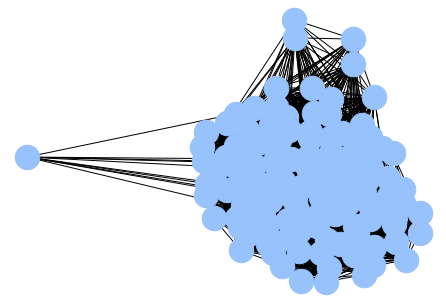

[((1, '1'), (1, '2')), ((1, '1'), (1, '37')), ((1, '1'), (0, '6')), ((1, '1'), (0, '60')), ((1, '1'), (0, '8')), ((1, '1'), (0, '9')), ((1, '1'), (1, '1')), ((1, '1'), (1, '119')), ((1, '1'), (1, '128')), ((1, '1'), (1, '143')), ((1, '1'), (1, '157')), ((1, '1'), (1, '164')), ((1, '1'), (1, '154')), ((1, '1'), (1, '21')), ((1, '1'), (1, '24')), ((1, '1'), (1, '31')), ((1, '1'), (1, '102')), ((1, '1'), (1, '35')), ((1, '1'), (1, '39')), ((1, '1'), (1, '45')), ((1, '1'), (1, '5')), ((1, '1'), (1, '52')), ((1, '1'), (1, '151')), ((1, '1'), (1, '58')), ((1, '1'), (1, '135')), ((1, '1'), (1, '56')), ((1, '1'), (0, '66')), ((1, '1'), (0, '67')), ((1, '1'), (0, '68')), ((1, '1'), (1, '147')), ((1, '1'), (0, '70')), ((1, '1'), (0, '73')), ((1, '1'), (0, '75')), ((1, '1'), (0, '76')), ((1, '1'), (0, '78')), ((1, '1'), (0, '80')), ((1, '1'), (0, '81')), ((1, '1'), (0, '82')), ((1, '1'), (0, '85')), ((1, '1'), (0, '86')), ((1, '1'), (0, '87')), ((1, '1'), (0, '88')), ((1, '1'), (0, '89')), ((1, '

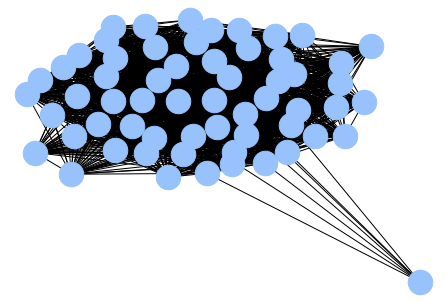

[((2, '1'), (2, '2')), ((2, '1'), (2, '31')), ((2, '1'), (2, '6')), ((2, '1'), (2, '74')), ((2, '1'), (2, '86')), ((2, '1'), (2, '1')), ((2, '1'), (2, '119')), ((2, '1'), (2, '128')), ((2, '1'), (2, '157')), ((2, '1'), (2, '147')), ((2, '1'), (2, '101')), ((2, '1'), (2, '39')), ((2, '1'), (2, '52')), ((2, '1'), (2, '111')), ((2, '2'), (2, '128')), ((2, '2'), (2, '6')), ((2, '2'), (2, '74')), ((2, '2'), (2, '119')), ((2, '2'), (2, '157')), ((2, '2'), (2, '147')), ((2, '2'), (2, '2')), ((2, '2'), (2, '31')), ((2, '2'), (2, '39')), ((2, '2'), (2, '52')), ((2, '2'), (2, '86')), ((2, '2'), (2, '111')), ((2, '2'), (2, '101')), ((2, '31'), (2, '119')), ((2, '31'), (2, '111')), ((2, '31'), (2, '74')), ((2, '31'), (2, '6')), ((2, '31'), (2, '147')), ((2, '31'), (2, '101')), ((2, '31'), (2, '52')), ((2, '31'), (2, '39')), ((2, '31'), (2, '31')), ((2, '31'), (2, '128')), ((2, '31'), (2, '157')), ((2, '31'), (2, '86')), ((2, '6'), (2, '39')), ((2, '6'), (2, '6')), ((2, '6'), (2, '147')), ((2, '6')

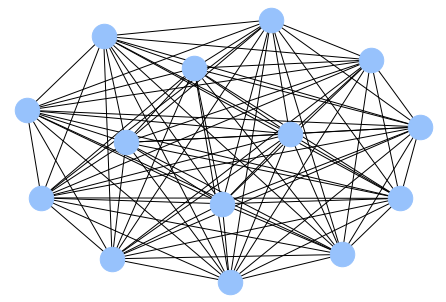

[((3, '1'), (3, '157')), ((3, '1'), (3, '39')), ((3, '1'), (2, '74')), ((3, '1'), (2, '86')), ((3, '1'), (3, '1')), ((3, '1'), (3, '119')), ((3, '157'), (3, '119')), ((3, '157'), (3, '39')), ((3, '157'), (2, '74')), ((3, '157'), (3, '157')), ((3, '157'), (2, '86')), ((3, '39'), (3, '39')), ((3, '39'), (3, '119')), ((3, '39'), (2, '74')), ((3, '39'), (2, '86')), ((2, '74'), (2, '86')), ((2, '74'), (3, '119')), ((2, '74'), (2, '74')), ((2, '86'), (3, '119')), ((2, '86'), (2, '86')), ((3, '119'), (3, '119'))]


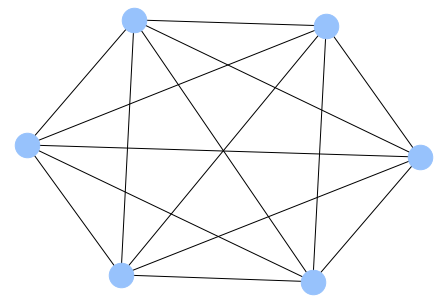

[((4, '1'), (4, '119')), ((4, '1'), (4, '1')), ((4, '119'), (4, '119'))]


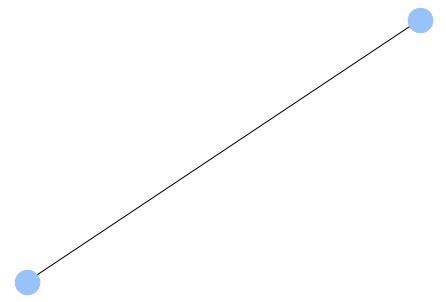

In [46]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=600, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

---

In [21]:
res2 = multicoll(G2, motif)

{(0, '1'): (1, '1'), (0, '10'): (1, '1'), (0, '100'): (0, '100'), (0, '101'): (0, '101'), (0, '102'): (0, '102'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (1, '1'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '18'): (0, '18'), (0, '19'): (0, 

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (0, '104'): (1, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '15'): (1, '104'), (0, '16'): (0, '16'), (0, '17'): (1, '104'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, 

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (0, '107'): (1, '107'), (0, '108'): (1, '107'), (0, '109'): (1, '107'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '16'): (0, '16'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '28'): (0, '2

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '107'): (1, '107'), (1, '110'): (1, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (0, '119'): (1, '119'), (0, '12'): (0, '12'), (0, '120'): (1, '119'), (0, '121'): (0, '121'), (0, '122'): (1, '119'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '16'): (0, '16'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '28'): (0, '28'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '107'): (1, '107'), (1, '110'): (1, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '121'): (1, '121'), (1, '125'): (1, '125'), (0, '126'): (0, '126'), (0, '127'): (1, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '16'): (0, '16'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '24'): (0, '24'), (0, '27'): (1, '127'), (0, '28'): (0, '28'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (1, '127'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '38'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '43'): (0, '43'),

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (2, '107'): (2, '107'), (1, '110'): (1, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '121'): (1, '121'), (1, '125'): (1, '125'), (0, '126'): (0, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (0, '130'): (1, '130'), (0, '131'): (0, '131'), (0, '19'): (0, '19'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '24'): (0, '24'), (0, '28'): (0, '28'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '38'), (0, '39'): (1, '130'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (2, '106'): (2, '106'), (2, '107'): (2, '107'), (1, '110'): (1, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '121'): (1, '121'), (1, '125'): (1, '125'), (0, '126'): (0, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '131'): (1, '131'), (1, '19'): (1, '19'), (1, '29'): (1, '29'), (1, '3'): (1, '3'), (0, '31'): (1, '31'), (0, '32'): (1, '31'), (0, '36'): (1, '31'), (0, '38'): (0, '38'), (0, '42'): (0, '42'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '52'): (0, '52'), (0, '54'): (0, '54'), (0, '55'): (0, '55'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '60'): (0, '60'), (0, '61'): (0, '61'), (0,

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (2, '106'): (2, '106'), (2, '107'): (2, '107'), (1, '110'): (1, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '121'): (1, '121'), (2, '125'): (2, '125'), (0, '126'): (0, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '19'): (1, '19'), (1, '29'): (1, '29'), (1, '3'): (1, '3'), (1, '31'): (1, '31'), (1, '43'): (1, '43'), (0, '47'): (0, '47'), (1, '50'): (1, '50'), (0, '52'): (1, '52'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '60'): (0, '60'), (0, '61'): (0, '61'), (0, '63'): (0, '63'), (0, '64'): (0, '64'), (0, '65'): (0, '65'), (0, '66'): (1, '52'), (0, '67'): (1, '52'), (0, '68'): (0, '68'), (0, '69'): (0, '69'), (0, '7'): (0, '7'), (0, '71'): (0, '71'), (0, '72'): (0, '72'), (0, '73'): (0, '73'), (0, '

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '103'): (2, '103'), (1, '104'): (1, '104'), (2, '105'): (2, '105'), (2, '106'): (2, '106'), (2, '107'): (2, '107'), (2, '110'): (2, '110'), (1, '113'): (1, '113'), (1, '116'): (1, '116'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '121'): (1, '121'), (2, '125'): (2, '125'), (0, '126'): (0, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (2, '130'): (2, '130'), (1, '19'): (1, '19'), (1, '31'): (1, '31'), (1, '43'): (1, '43'), (0, '47'): (0, '47'), (1, '50'): (1, '50'), (1, '52'): (1, '52'), (1, '56'): (1, '56'), (1, '60'): (1, '60'), (0, '7'): (1, '7'), (0, '71'): (0, '71'), (0, '72'): (0, '72'), (0, '73'): (0, '73'), (0, '74'): (0, '74'), (0, '75'): (0, '75'), (0, '76'): (0, '76'), (0, '78'): (0, '78'), (0, '79'): (0, '79'), (0, '80'): (0, '80'), (0, '81'): (0, '81'), (0, '82'): (0, '82'), (0, '83'): (1, '7'), (0, '84'): (0, '84'), (0, '85'): (0, '85'), (0, '86'): (0, '86'), (0, '87'): (0, '87'), (0, 

{(3, '1'): (3, '1'), (2, '100'): (2, '100'), (3, '103'): (3, '103'), (2, '104'): (2, '104'), (2, '105'): (2, '105'), (2, '106'): (2, '106'), (2, '107'): (3, '107'), (2, '110'): (2, '110'), (2, '113'): (2, '113'), (1, '121'): (3, '107'), (2, '125'): (2, '125'), (0, '126'): (0, '126'), (2, '127'): (2, '127'), (1, '13'): (1, '13'), (2, '130'): (2, '130'), (1, '19'): (1, '19'), (1, '31'): (1, '31'), (1, '43'): (1, '43'), (0, '47'): (0, '47'), (1, '52'): (3, '107'), (1, '60'): (1, '60'), (1, '7'): (1, '7'), (2, '73'): (2, '73'), (1, '74'): (1, '74'), (1, '75'): (1, '75'), (1, '78'): (1, '78'), (1, '85'): (1, '85'), (1, '90'): (1, '90'), (1, '91'): (1, '91')}
{(3, '1'): (3, '1'), (2, '100'): (2, '100'), (3, '103'): (3, '103'), (2, '104'): (2, '104'), (2, '105'): (2, '105'), (2, '106'): (2, '106'), (3, '107'): (3, '107'), (2, '110'): (2, '110'), (2, '113'): (2, '113'), (2, '125'): (2, '125'), (0, '126'): (0, '126'), (2, '127'): (2, '127'), (1, '13'): (2, '13'), (2, '130'): (2, '130'), (1, '19

In [22]:
res2

[(0,
  (131,
   [(0, '1'),
    (0, '10'),
    (0, '100'),
    (0, '101'),
    (0, '102'),
    (0, '103'),
    (0, '104'),
    (0, '105'),
    (0, '106'),
    (0, '107'),
    (0, '108'),
    (0, '109'),
    (0, '11'),
    (0, '110'),
    (0, '111'),
    (0, '112'),
    (0, '113'),
    (0, '114'),
    (0, '115'),
    (0, '116'),
    (0, '117'),
    (0, '118'),
    (0, '119'),
    (0, '12'),
    (0, '120'),
    (0, '121'),
    (0, '122'),
    (0, '123'),
    (0, '124'),
    (0, '125'),
    (0, '126'),
    (0, '127'),
    (0, '128'),
    (0, '129'),
    (0, '13'),
    (0, '130'),
    (0, '131'),
    (0, '14'),
    (0, '15'),
    (0, '16'),
    (0, '17'),
    (0, '18'),
    (0, '19'),
    (0, '2'),
    (0, '20'),
    (0, '21'),
    (0, '22'),
    (0, '23'),
    (0, '24'),
    (0, '25'),
    (0, '26'),
    (0, '27'),
    (0, '28'),
    (0, '29'),
    (0, '3'),
    (0, '30'),
    (0, '31'),
    (0, '32'),
    (0, '33'),
    (0, '34'),
    (0, '35'),
    (0, '36'),
    (0, '37'),
    (0, '38')

In [23]:
livello2, num_nodi2, nodi2, archi2 = [], [], [], []
for i in res2:
    livello2.append(i[0])
    num_nodi2.append(i[1][0])
    nodi2.append(i[1][1])
    archi2.append(i[1][2])

print("Livello: ", livello2, "\n# nodi: ", num_nodi2,
      "\nNodi: ", nodi2, "\nArchi: ", archi2, "\n\n")

Livello:  [0, 1, 2, 3, 4, 5] 
# nodi:  [131, 99, 55, 15, 7, 5] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54')

[((0, '1'), (0, '2')), ((0, '1'), (0, '3')), ((0, '1'), (0, '4')), ((0, '1'), (0, '5')), ((0, '1'), (0, '6')), ((0, '1'), (0, '7')), ((0, '1'), (0, '8')), ((0, '1'), (0, '9')), ((0, '1'), (0, '10')), ((0, '1'), (0, '11')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '14')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '18')), ((0, '1'), (0, '19')), ((0, '1'), (0, '20')), ((0, '1'), (0, '21')), ((0, '1'), (0, '22')), ((0, '1'), (0, '23')), ((0, '1'), (0, '24')), ((0, '1'), (0, '25')), ((0, '1'), (0, '26')), ((0, '1'), (0, '27')), ((0, '1'), (0, '28')), ((0, '1'), (0, '29')), ((0, '1'), (0, '30')), ((0, '1'), (0, '31')), ((0, '1'), (0, '32')), ((0, '1'), (0, '33')), ((0, '1'), (0, '34')), ((0, '1'), (0, '35')), ((0, '1'), (0, '36')), ((0, '1'), (0, '37')), ((0, '1'), (0, '38')), ((0, '1'), (0, '39')), ((0, '1'), (0, '40')), ((0, '1'), (0, '41')), ((0, '2'), (0, '50')), ((0, '2'), (0, '56')), ((0, '2'), (0, '23')), ((0, '2'), (0, '25

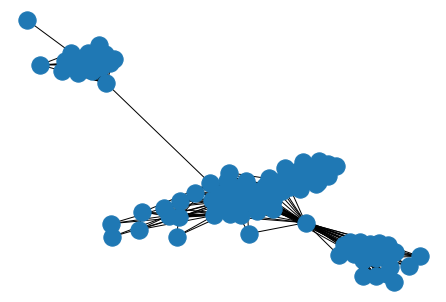

[((1, '1'), (1, '103')), ((1, '1'), (0, '3')), ((1, '1'), (1, '128')), ((1, '1'), (0, '5')), ((1, '1'), (0, '6')), ((1, '1'), (0, '7')), ((1, '1'), (0, '8')), ((1, '1'), (0, '9')), ((1, '1'), (1, '1')), ((1, '1'), (1, '12')), ((1, '1'), (0, '13')), ((1, '1'), (1, '104')), ((1, '1'), (0, '16')), ((1, '1'), (0, '18')), ((1, '1'), (0, '19')), ((1, '1'), (0, '20')), ((1, '1'), (0, '21')), ((1, '1'), (1, '105')), ((1, '1'), (0, '24')), ((1, '1'), (1, '127')), ((1, '1'), (0, '28')), ((1, '1'), (0, '29')), ((1, '1'), (0, '30')), ((1, '1'), (0, '31')), ((1, '1'), (0, '32')), ((1, '1'), (1, '125')), ((1, '1'), (0, '35')), ((1, '1'), (0, '36')), ((1, '1'), (0, '38')), ((1, '1'), (0, '39')), ((1, '1'), (0, '40')), ((1, '1'), (0, '41')), ((1, '1'), (0, '50')), ((1, '1'), (0, '63')), ((1, '1'), (0, '71')), ((1, '1'), (0, '56')), ((1, '1'), (0, '77')), ((1, '1'), (0, '86')), ((1, '1'), (0, '60')), ((1, '1'), (0, '61')), ((1, '1'), (0, '64')), ((1, '1'), (0, '81')), ((1, '1'), (0, '54')), ((1, '1'), 

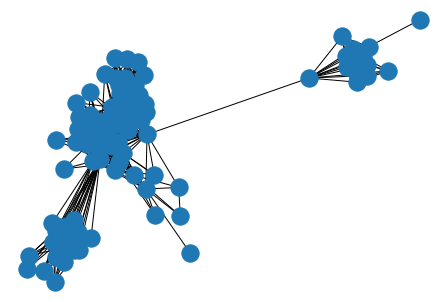

[((2, '1'), (2, '103')), ((2, '1'), (2, '130')), ((2, '1'), (1, '128')), ((2, '1'), (2, '100')), ((2, '1'), (1, '7')), ((2, '1'), (2, '1')), ((2, '1'), (1, '12')), ((2, '1'), (1, '13')), ((2, '1'), (1, '104')), ((2, '1'), (1, '19')), ((2, '1'), (2, '125')), ((2, '1'), (2, '105')), ((2, '1'), (1, '127')), ((2, '1'), (2, '106')), ((2, '1'), (1, '31')), ((2, '1'), (1, '50')), ((2, '1'), (0, '71')), ((2, '1'), (1, '56')), ((2, '1'), (1, '60')), ((2, '1'), (0, '86')), ((2, '1'), (0, '81')), ((2, '1'), (0, '94')), ((2, '1'), (0, '85')), ((2, '1'), (0, '90')), ((2, '1'), (0, '97')), ((2, '1'), (0, '73')), ((2, '1'), (0, '74')), ((2, '1'), (0, '92')), ((2, '1'), (0, '76')), ((2, '1'), (0, '79')), ((2, '1'), (0, '80')), ((2, '1'), (0, '82')), ((2, '1'), (0, '87')), ((2, '1'), (0, '88')), ((2, '1'), (0, '89')), ((2, '1'), (0, '99')), ((2, '1'), (0, '93')), ((2, '1'), (0, '95')), ((2, '1'), (0, '84')), ((2, '1'), (0, '98')), ((2, '1'), (1, '43')), ((2, '103'), (1, '50')), ((2, '103'), (1, '56')),

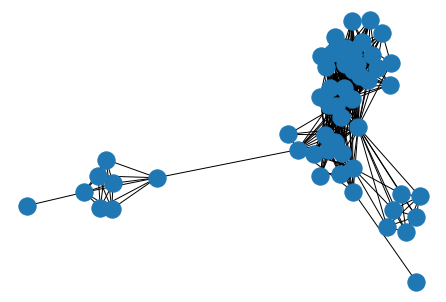

[((3, '1'), (3, '103')), ((3, '1'), (2, '130')), ((3, '1'), (3, '105')), ((3, '1'), (3, '100')), ((3, '1'), (2, '60')), ((3, '1'), (3, '1')), ((3, '1'), (3, '104')), ((3, '1'), (2, '13')), ((3, '1'), (2, '73')), ((3, '1'), (2, '74')), ((3, '1'), (3, '107')), ((3, '103'), (3, '103')), ((3, '103'), (3, '104')), ((3, '103'), (3, '105')), ((3, '103'), (2, '73')), ((3, '103'), (2, '60')), ((3, '103'), (2, '130')), ((3, '103'), (2, '74')), ((2, '130'), (2, '130')), ((2, '130'), (3, '105')), ((2, '130'), (3, '104')), ((2, '130'), (2, '73')), ((2, '130'), (2, '60')), ((3, '105'), (3, '104')), ((3, '105'), (3, '105')), ((3, '105'), (2, '60')), ((3, '105'), (2, '73')), ((3, '105'), (2, '74')), ((3, '105'), (2, '13')), ((3, '105'), (3, '100')), ((3, '105'), (0, '47')), ((3, '100'), (2, '13')), ((3, '100'), (3, '100')), ((2, '60'), (3, '104')), ((2, '60'), (2, '60')), ((2, '60'), (2, '73')), ((2, '60'), (2, '74')), ((3, '104'), (3, '104')), ((3, '104'), (2, '73')), ((3, '104'), (2, '74')), ((2, '1

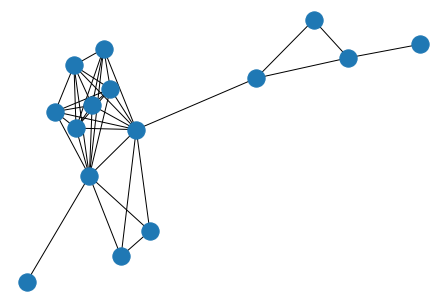

[((4, '1'), (4, '103')), ((4, '1'), (3, '130')), ((4, '1'), (3, '105')), ((4, '1'), (4, '1')), ((4, '1'), (4, '107')), ((4, '103'), (4, '103')), ((4, '103'), (3, '105')), ((4, '103'), (3, '130')), ((3, '130'), (3, '130')), ((3, '130'), (3, '105')), ((3, '105'), (3, '105')), ((3, '105'), (0, '47')), ((4, '107'), (4, '107')), ((4, '107'), (0, '126'))]


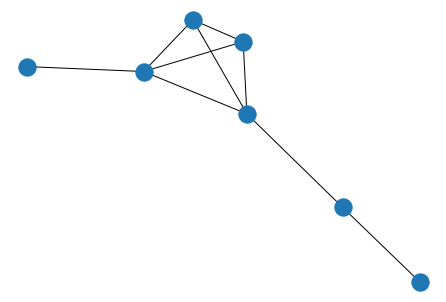

[((5, '1'), (4, '103')), ((5, '1'), (5, '1')), ((5, '1'), (4, '107')), ((5, '1'), (0, '47')), ((4, '103'), (4, '103')), ((4, '107'), (4, '107')), ((4, '107'), (0, '126'))]


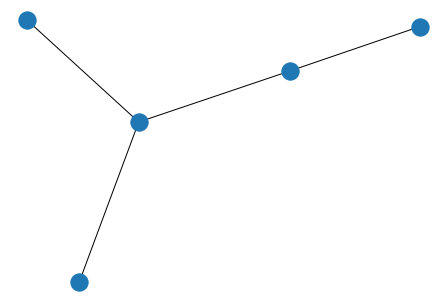

In [24]:
for i in archi2:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

In [49]:
for i in res2:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  131 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0,

[((0, '1'), (0, '2')), ((0, '1'), (0, '3')), ((0, '1'), (0, '4')), ((0, '1'), (0, '5')), ((0, '1'), (0, '6')), ((0, '1'), (0, '7')), ((0, '1'), (0, '8')), ((0, '1'), (0, '9')), ((0, '1'), (0, '10')), ((0, '1'), (0, '11')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '14')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '18')), ((0, '1'), (0, '19')), ((0, '1'), (0, '20')), ((0, '1'), (0, '21')), ((0, '1'), (0, '22')), ((0, '1'), (0, '23')), ((0, '1'), (0, '24')), ((0, '1'), (0, '25')), ((0, '1'), (0, '26')), ((0, '1'), (0, '27')), ((0, '1'), (0, '28')), ((0, '1'), (0, '29')), ((0, '1'), (0, '30')), ((0, '1'), (0, '31')), ((0, '1'), (0, '32')), ((0, '1'), (0, '33')), ((0, '1'), (0, '34')), ((0, '1'), (0, '35')), ((0, '1'), (0, '36')), ((0, '1'), (0, '37')), ((0, '1'), (0, '38')), ((0, '1'), (0, '39')), ((0, '1'), (0, '40')), ((0, '1'), (0, '41')), ((0, '2'), (0, '50')), ((0, '2'), (0, '56')), ((0, '2'), (0, '23')), ((0, '2'), (0, '25

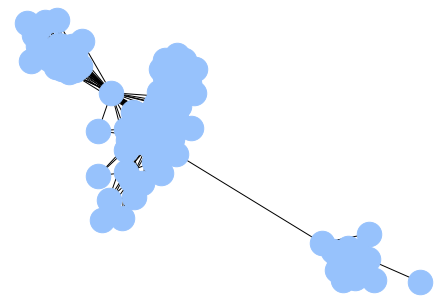

[((1, '1'), (1, '103')), ((1, '1'), (0, '3')), ((1, '1'), (1, '128')), ((1, '1'), (0, '5')), ((1, '1'), (0, '6')), ((1, '1'), (0, '7')), ((1, '1'), (0, '8')), ((1, '1'), (0, '9')), ((1, '1'), (1, '1')), ((1, '1'), (1, '12')), ((1, '1'), (0, '13')), ((1, '1'), (1, '104')), ((1, '1'), (0, '16')), ((1, '1'), (0, '18')), ((1, '1'), (0, '19')), ((1, '1'), (0, '20')), ((1, '1'), (0, '21')), ((1, '1'), (1, '105')), ((1, '1'), (0, '24')), ((1, '1'), (1, '127')), ((1, '1'), (0, '28')), ((1, '1'), (0, '29')), ((1, '1'), (0, '30')), ((1, '1'), (0, '31')), ((1, '1'), (0, '32')), ((1, '1'), (1, '125')), ((1, '1'), (0, '35')), ((1, '1'), (0, '36')), ((1, '1'), (0, '38')), ((1, '1'), (0, '39')), ((1, '1'), (0, '40')), ((1, '1'), (0, '41')), ((1, '1'), (0, '50')), ((1, '1'), (0, '63')), ((1, '1'), (0, '71')), ((1, '1'), (0, '56')), ((1, '1'), (0, '77')), ((1, '1'), (0, '86')), ((1, '1'), (0, '60')), ((1, '1'), (0, '61')), ((1, '1'), (0, '64')), ((1, '1'), (0, '81')), ((1, '1'), (0, '54')), ((1, '1'), 

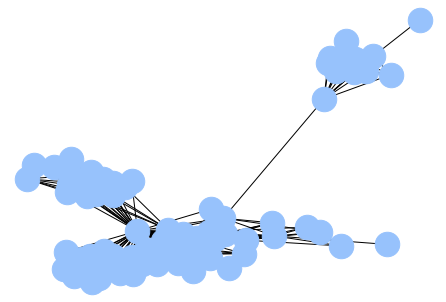

[((2, '1'), (2, '103')), ((2, '1'), (2, '130')), ((2, '1'), (1, '128')), ((2, '1'), (2, '100')), ((2, '1'), (1, '7')), ((2, '1'), (2, '1')), ((2, '1'), (1, '12')), ((2, '1'), (1, '13')), ((2, '1'), (1, '104')), ((2, '1'), (1, '19')), ((2, '1'), (2, '125')), ((2, '1'), (2, '105')), ((2, '1'), (1, '127')), ((2, '1'), (2, '106')), ((2, '1'), (1, '31')), ((2, '1'), (1, '50')), ((2, '1'), (0, '71')), ((2, '1'), (1, '56')), ((2, '1'), (1, '60')), ((2, '1'), (0, '86')), ((2, '1'), (0, '81')), ((2, '1'), (0, '94')), ((2, '1'), (0, '85')), ((2, '1'), (0, '90')), ((2, '1'), (0, '97')), ((2, '1'), (0, '73')), ((2, '1'), (0, '74')), ((2, '1'), (0, '92')), ((2, '1'), (0, '76')), ((2, '1'), (0, '79')), ((2, '1'), (0, '80')), ((2, '1'), (0, '82')), ((2, '1'), (0, '87')), ((2, '1'), (0, '88')), ((2, '1'), (0, '89')), ((2, '1'), (0, '99')), ((2, '1'), (0, '93')), ((2, '1'), (0, '95')), ((2, '1'), (0, '84')), ((2, '1'), (0, '98')), ((2, '1'), (1, '43')), ((2, '103'), (1, '50')), ((2, '103'), (1, '56')),

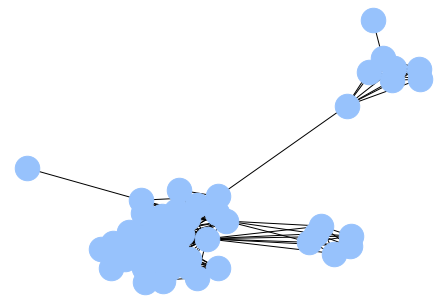

[((3, '1'), (3, '103')), ((3, '1'), (2, '130')), ((3, '1'), (3, '105')), ((3, '1'), (3, '100')), ((3, '1'), (2, '60')), ((3, '1'), (3, '1')), ((3, '1'), (3, '104')), ((3, '1'), (2, '13')), ((3, '1'), (2, '73')), ((3, '1'), (2, '74')), ((3, '1'), (3, '107')), ((3, '103'), (3, '103')), ((3, '103'), (3, '104')), ((3, '103'), (3, '105')), ((3, '103'), (2, '73')), ((3, '103'), (2, '60')), ((3, '103'), (2, '130')), ((3, '103'), (2, '74')), ((2, '130'), (2, '130')), ((2, '130'), (3, '105')), ((2, '130'), (3, '104')), ((2, '130'), (2, '73')), ((2, '130'), (2, '60')), ((3, '105'), (3, '104')), ((3, '105'), (3, '105')), ((3, '105'), (2, '60')), ((3, '105'), (2, '73')), ((3, '105'), (2, '74')), ((3, '105'), (2, '13')), ((3, '105'), (3, '100')), ((3, '105'), (0, '47')), ((3, '100'), (2, '13')), ((3, '100'), (3, '100')), ((2, '60'), (3, '104')), ((2, '60'), (2, '60')), ((2, '60'), (2, '73')), ((2, '60'), (2, '74')), ((3, '104'), (3, '104')), ((3, '104'), (2, '73')), ((3, '104'), (2, '74')), ((2, '1

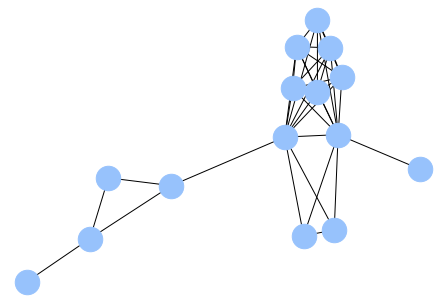

[((4, '1'), (4, '103')), ((4, '1'), (3, '130')), ((4, '1'), (3, '105')), ((4, '1'), (4, '1')), ((4, '1'), (4, '107')), ((4, '103'), (4, '103')), ((4, '103'), (3, '105')), ((4, '103'), (3, '130')), ((3, '130'), (3, '130')), ((3, '130'), (3, '105')), ((3, '105'), (3, '105')), ((3, '105'), (0, '47')), ((4, '107'), (4, '107')), ((4, '107'), (0, '126'))]


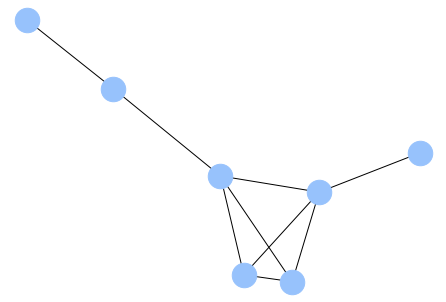

[((5, '1'), (4, '103')), ((5, '1'), (5, '1')), ((5, '1'), (4, '107')), ((5, '1'), (0, '47')), ((4, '103'), (4, '103')), ((4, '107'), (4, '107')), ((4, '107'), (0, '126'))]


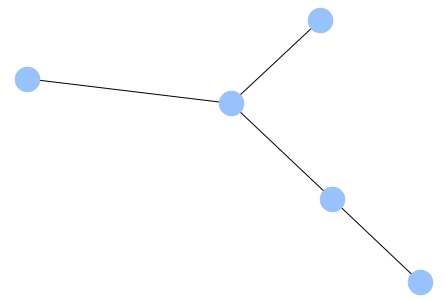

In [40]:
for i in archi2:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

***

In [25]:
res3 = multicoll(G3, motif)

{(0, '1'): (1, '1'), (0, '10'): (1, '1'), (0, '100'): (0, '100'), (0, '101'): (0, '101'), (0, '102'): (1, '1'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (0, '132'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '135'): (0, '135'), (0, '136'): (0, '136'), (0, '1

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (0, '101'): (1, '101'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (0, '132'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '135'): (0, '135'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (0, '104'): (1, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (1, '104'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (1, '104'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (0, '132'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '135'): (0, '135'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (0, '106'): (1, '106'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (0, '132'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '135'): (1, '106'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '14'): (1, '106'), (0, '140'): (0, '140'), (0

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (0, '109'): (1, '109'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (1, '109'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (1, '109'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'),

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (0, '111'): (1, '111'), (0, '112'): (1, '111'), (0, '114'): (1, '111'), (0, '115'): (0, '115'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'),

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (0, '119'): (1, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (1, '119'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (0, '120'): (1, '120'), (0, '121'): (0, '121'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (1, '120'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (0, '123'): (1, '123'), (0, '124'): (0, '124'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (0, '127'): (1, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '130'): (0, '130'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (0, '13'): (1, '13'), (0, '130'): (0, '130'), (0, '134'): (0, '134'), (0, '136'): (0, '136'), (0, '137'): (1, '13'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '147'): (0, '147'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (0, '134'): (1, '134'), (0, '136'): (0, '136'), (0, '138'): (0, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (0, '151'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (0, '138'): (1, '138'), (0, '139'): (0, '139'), (0, '140'): (0, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '151'): (1, '138'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (0, '140'): (1, '140'), (0, '142'): (0, '142'), (0, '143'): (0, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (0, '143'): (1, '143'), (0, '144'): (0, '144'), (0, '146'): (0, '146'), (0, '148'): (0, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (0, '148'): (1, '148'), (0, '149'): (0, '149'), (0, '15'): (0, '15'), (0, '150'): (0, '150'), (0, '152'): (0, '152'), (0, '153'): (0, '153'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (0, '15'): (1, '15'), (0, '150'): (0, '150'), (0, '152'): (0, '152'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (0, '160'): (0, '160'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (0, '152'): (1, '152'), (0, '155'): (0, '155'), (0, '156'): (0, '156'), (0, '157'): (0, '157'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (0, '160'): (0, '160'), (

{(1, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (0, '157'): (2, '1'), (0, '158'): (0, '158'), (0, '159'): (0, '159'), (0, '160'): (0, '160'), (0,

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (0, '159'): (1, '159'), (0, '160'): (0, '160'), (0, '163'): (0, '163'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (0, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (1, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (1, '12'): (1, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (1, '142'): (1, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (1, '119'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (1, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (1, '119'): (2, '100'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (1, '134'): (1, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (1, '148'): (1, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (2, '148'): (2, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (2, '104'): (2, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (1, '115'): (1, '115'), (2, '12'): (2, '12'), (1, '120'): (1, '120'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (2, '148'): (2, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (2, '104'): (2, '104'), (1, '105'): (1, '105'), (1, '106'): (1, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (2, '115'): (2, '115'), (2, '12'): (2, '12'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (2, '148'): (2, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (1, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (1, '17'): (1, '17'), (1,

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (2, '104'): (2, '104'), (2, '105'): (2, '105'), (2, '106'): (2, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (2, '115'): (2, '115'), (2, '12'): (2, '12'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (2, '148'): (2, '148'), (1, '149'): (1, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (1, '158'): (2, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (1, '17'): (1, '17'), (2,

{(2, '1'): (2, '1'), (2, '100'): (2, '100'), (2, '101'): (2, '101'), (1, '103'): (1, '103'), (2, '104'): (2, '104'), (2, '105'): (2, '105'), (2, '106'): (2, '106'), (1, '108'): (1, '108'), (1, '109'): (1, '109'), (1, '110'): (1, '110'), (1, '111'): (1, '111'), (2, '115'): (2, '115'), (2, '12'): (2, '12'), (2, '121'): (2, '121'), (1, '123'): (1, '123'), (0, '124'): (0, '124'), (1, '126'): (1, '126'), (1, '127'): (1, '127'), (1, '128'): (1, '128'), (1, '13'): (1, '13'), (1, '130'): (1, '130'), (2, '134'): (2, '134'), (1, '136'): (1, '136'), (1, '138'): (1, '138'), (1, '139'): (1, '139'), (1, '140'): (1, '140'), (2, '142'): (2, '142'), (1, '143'): (1, '143'), (1, '144'): (1, '144'), (2, '148'): (2, '148'), (2, '149'): (2, '149'), (1, '15'): (1, '15'), (1, '150'): (1, '150'), (1, '152'): (1, '152'), (1, '155'): (1, '155'), (0, '156'): (0, '156'), (2, '158'): (2, '158'), (1, '159'): (1, '159'), (1, '160'): (1, '160'), (1, '168'): (1, '168'), (1, '169'): (1, '169'), (1, '17'): (1, '17'), (2,

In [26]:
res3

[(0,
  (291,
   [(0, '1'),
    (0, '10'),
    (0, '100'),
    (0, '101'),
    (0, '102'),
    (0, '103'),
    (0, '104'),
    (0, '105'),
    (0, '106'),
    (0, '107'),
    (0, '108'),
    (0, '109'),
    (0, '11'),
    (0, '110'),
    (0, '111'),
    (0, '112'),
    (0, '113'),
    (0, '114'),
    (0, '115'),
    (0, '116'),
    (0, '117'),
    (0, '118'),
    (0, '119'),
    (0, '12'),
    (0, '120'),
    (0, '121'),
    (0, '122'),
    (0, '123'),
    (0, '124'),
    (0, '125'),
    (0, '126'),
    (0, '127'),
    (0, '128'),
    (0, '129'),
    (0, '13'),
    (0, '130'),
    (0, '131'),
    (0, '132'),
    (0, '133'),
    (0, '134'),
    (0, '135'),
    (0, '136'),
    (0, '137'),
    (0, '138'),
    (0, '139'),
    (0, '14'),
    (0, '140'),
    (0, '141'),
    (0, '142'),
    (0, '143'),
    (0, '144'),
    (0, '145'),
    (0, '146'),
    (0, '147'),
    (0, '148'),
    (0, '149'),
    (0, '15'),
    (0, '150'),
    (0, '151'),
    (0, '152'),
    (0, '153'),
    (0, '154'),
   

In [27]:
livello3, num_nodi3, nodi3, archi3 = [], [], [], []
for i in res3:
    livello3.append(i[0])
    num_nodi3.append(i[1][0])
    nodi3.append(i[1][1])
    archi3.append(i[1][2])

print("Livello: ", livello3, "\n# nodi: ", num_nodi3,
      "\nNodi: ", nodi3, "\nArchi: ", archi3, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [291, 219, 93] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '17'), (0, '17

In [50]:
for i in res3:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  291 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '17'), (0, '170'), (0, '171'), (0,

[((0, '1'), (0, '133')), ((0, '1'), (0, '265')), ((0, '1'), (0, '10')), ((0, '1'), (0, '267')), ((0, '1'), (0, '12')), ((0, '1'), (0, '142')), ((0, '1'), (0, '271')), ((0, '1'), (0, '16')), ((0, '1'), (0, '273')), ((0, '1'), (0, '276')), ((0, '1'), (0, '22')), ((0, '1'), (0, '29')), ((0, '1'), (0, '158')), ((0, '1'), (0, '287')), ((0, '1'), (0, '32')), ((0, '1'), (0, '37')), ((0, '1'), (0, '241')), ((0, '1'), (0, '174')), ((0, '1'), (0, '183')), ((0, '1'), (0, '191')), ((0, '1'), (0, '202')), ((0, '1'), (0, '204')), ((0, '1'), (0, '205')), ((0, '1'), (0, '82')), ((0, '1'), (0, '87')), ((0, '1'), (0, '222')), ((0, '1'), (0, '102')), ((0, '1'), (0, '113')), ((0, '1'), (0, '116')), ((0, '133'), (0, '8')), ((0, '133'), (0, '12')), ((0, '133'), (0, '13')), ((0, '133'), (0, '22')), ((0, '133'), (0, '27')), ((0, '133'), (0, '31')), ((0, '133'), (0, '32')), ((0, '133'), (0, '33')), ((0, '133'), (0, '34')), ((0, '133'), (0, '35')), ((0, '133'), (0, '36')), ((0, '133'), (0, '39')), ((0, '133'), 

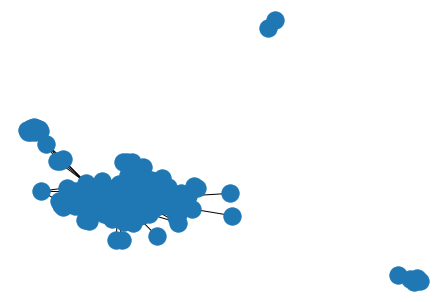

[((1, '1'), (1, '12')), ((1, '1'), (0, '265')), ((1, '1'), (1, '1')), ((1, '1'), (0, '267')), ((1, '1'), (1, '142')), ((1, '1'), (0, '271')), ((1, '1'), (1, '121')), ((1, '1'), (0, '273')), ((1, '1'), (0, '276')), ((1, '1'), (0, '22')), ((1, '1'), (0, '29')), ((1, '1'), (0, '158')), ((1, '1'), (0, '287')), ((1, '1'), (0, '32')), ((1, '1'), (0, '37')), ((1, '1'), (0, '241')), ((1, '1'), (1, '101')), ((1, '1'), (0, '183')), ((1, '1'), (0, '205')), ((1, '1'), (0, '82')), ((1, '1'), (0, '87')), ((1, '1'), (1, '100')), ((1, '1'), (1, '104')), ((1, '1'), (1, '109')), ((1, '1'), (0, '224')), ((1, '1'), (0, '34')), ((1, '1'), (0, '194')), ((1, '1'), (0, '64')), ((1, '1'), (0, '43')), ((1, '1'), (1, '108')), ((1, '1'), (1, '111')), ((1, '1'), (0, '17')), ((1, '1'), (1, '139')), ((1, '1'), (1, '105')), ((1, '1'), (0, '220')), ((1, '1'), (0, '157')), ((1, '1'), (0, '4')), ((1, '1'), (0, '59')), ((1, '1'), (0, '98')), ((1, '1'), (0, '283')), ((1, '1'), (0, '289')), ((1, '1'), (0, '179')), ((1, '1'

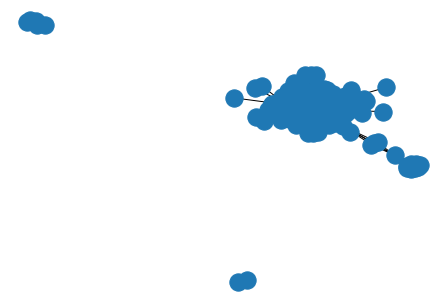

[((2, '1'), (2, '12')), ((2, '1'), (2, '101')), ((2, '1'), (2, '1')), ((2, '1'), (1, '256')), ((2, '1'), (2, '142')), ((2, '1'), (2, '183')), ((2, '1'), (2, '121')), ((2, '1'), (1, '258')), ((2, '1'), (1, '205')), ((2, '1'), (2, '158')), ((2, '1'), (2, '148')), ((2, '1'), (1, '208')), ((2, '1'), (1, '59')), ((2, '1'), (0, '87')), ((2, '1'), (2, '100')), ((2, '1'), (2, '104')), ((2, '1'), (1, '109')), ((2, '1'), (1, '19')), ((2, '1'), (1, '168')), ((2, '1'), (1, '64')), ((2, '1'), (1, '260')), ((2, '1'), (1, '108')), ((2, '1'), (1, '111')), ((2, '1'), (1, '17')), ((2, '1'), (1, '139')), ((2, '1'), (2, '105')), ((2, '1'), (1, '207')), ((2, '1'), (1, '289')), ((2, '1'), (1, '159')), ((2, '1'), (1, '192')), ((2, '1'), (0, '198')), ((2, '1'), (1, '230')), ((2, '12'), (1, '8')), ((2, '12'), (2, '12')), ((2, '12'), (1, '13')), ((2, '12'), (1, '205')), ((2, '12'), (1, '244')), ((2, '12'), (2, '105')), ((2, '12'), (2, '158')), ((2, '12'), (1, '289')), ((2, '12'), (1, '256')), ((2, '12'), (1, '1

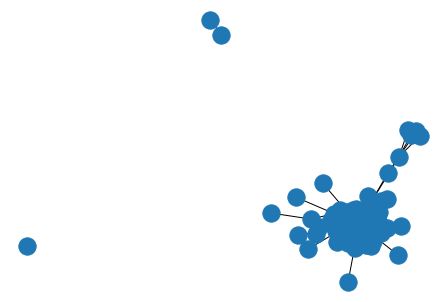

In [28]:
for i in archi3:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

[((0, '1'), (0, '133')), ((0, '1'), (0, '265')), ((0, '1'), (0, '10')), ((0, '1'), (0, '267')), ((0, '1'), (0, '12')), ((0, '1'), (0, '142')), ((0, '1'), (0, '271')), ((0, '1'), (0, '16')), ((0, '1'), (0, '273')), ((0, '1'), (0, '276')), ((0, '1'), (0, '22')), ((0, '1'), (0, '29')), ((0, '1'), (0, '158')), ((0, '1'), (0, '287')), ((0, '1'), (0, '32')), ((0, '1'), (0, '37')), ((0, '1'), (0, '241')), ((0, '1'), (0, '174')), ((0, '1'), (0, '183')), ((0, '1'), (0, '191')), ((0, '1'), (0, '202')), ((0, '1'), (0, '204')), ((0, '1'), (0, '205')), ((0, '1'), (0, '82')), ((0, '1'), (0, '87')), ((0, '1'), (0, '222')), ((0, '1'), (0, '102')), ((0, '1'), (0, '113')), ((0, '1'), (0, '116')), ((0, '133'), (0, '8')), ((0, '133'), (0, '12')), ((0, '133'), (0, '13')), ((0, '133'), (0, '22')), ((0, '133'), (0, '27')), ((0, '133'), (0, '31')), ((0, '133'), (0, '32')), ((0, '133'), (0, '33')), ((0, '133'), (0, '34')), ((0, '133'), (0, '35')), ((0, '133'), (0, '36')), ((0, '133'), (0, '39')), ((0, '133'), 

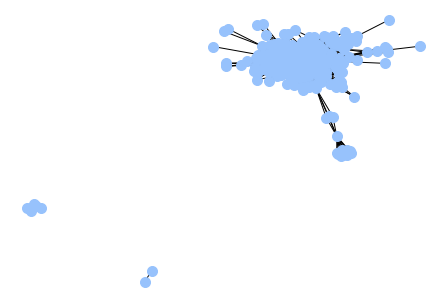

[((1, '1'), (1, '12')), ((1, '1'), (0, '265')), ((1, '1'), (1, '1')), ((1, '1'), (0, '267')), ((1, '1'), (1, '142')), ((1, '1'), (0, '271')), ((1, '1'), (1, '121')), ((1, '1'), (0, '273')), ((1, '1'), (0, '276')), ((1, '1'), (0, '22')), ((1, '1'), (0, '29')), ((1, '1'), (0, '158')), ((1, '1'), (0, '287')), ((1, '1'), (0, '32')), ((1, '1'), (0, '37')), ((1, '1'), (0, '241')), ((1, '1'), (1, '101')), ((1, '1'), (0, '183')), ((1, '1'), (0, '205')), ((1, '1'), (0, '82')), ((1, '1'), (0, '87')), ((1, '1'), (1, '100')), ((1, '1'), (1, '104')), ((1, '1'), (1, '109')), ((1, '1'), (0, '224')), ((1, '1'), (0, '34')), ((1, '1'), (0, '194')), ((1, '1'), (0, '64')), ((1, '1'), (0, '43')), ((1, '1'), (1, '108')), ((1, '1'), (1, '111')), ((1, '1'), (0, '17')), ((1, '1'), (1, '139')), ((1, '1'), (1, '105')), ((1, '1'), (0, '220')), ((1, '1'), (0, '157')), ((1, '1'), (0, '4')), ((1, '1'), (0, '59')), ((1, '1'), (0, '98')), ((1, '1'), (0, '283')), ((1, '1'), (0, '289')), ((1, '1'), (0, '179')), ((1, '1'

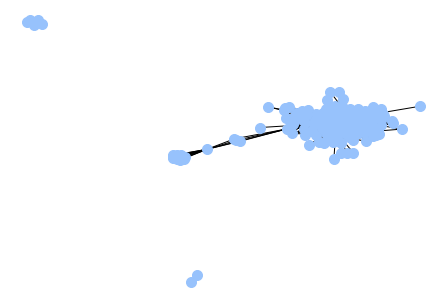

[((2, '1'), (2, '12')), ((2, '1'), (2, '101')), ((2, '1'), (2, '1')), ((2, '1'), (1, '256')), ((2, '1'), (2, '142')), ((2, '1'), (2, '183')), ((2, '1'), (2, '121')), ((2, '1'), (1, '258')), ((2, '1'), (1, '205')), ((2, '1'), (2, '158')), ((2, '1'), (2, '148')), ((2, '1'), (1, '208')), ((2, '1'), (1, '59')), ((2, '1'), (0, '87')), ((2, '1'), (2, '100')), ((2, '1'), (2, '104')), ((2, '1'), (1, '109')), ((2, '1'), (1, '19')), ((2, '1'), (1, '168')), ((2, '1'), (1, '64')), ((2, '1'), (1, '260')), ((2, '1'), (1, '108')), ((2, '1'), (1, '111')), ((2, '1'), (1, '17')), ((2, '1'), (1, '139')), ((2, '1'), (2, '105')), ((2, '1'), (1, '207')), ((2, '1'), (1, '289')), ((2, '1'), (1, '159')), ((2, '1'), (1, '192')), ((2, '1'), (0, '198')), ((2, '1'), (1, '230')), ((2, '12'), (1, '8')), ((2, '12'), (2, '12')), ((2, '12'), (1, '13')), ((2, '12'), (1, '205')), ((2, '12'), (1, '244')), ((2, '12'), (2, '105')), ((2, '12'), (2, '158')), ((2, '12'), (1, '289')), ((2, '12'), (1, '256')), ((2, '12'), (1, '1

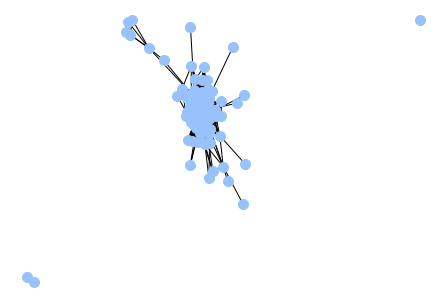

In [42]:
for i in archi3:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

### Procedura frattale

[torna su](#Indice)

Comprimi **solo se** il livello è uguale all'interno del motif

si potrebbe trovare una legge di multipli per sapere già i nodi comprimibili (?)

compressione di strutture di nodi indipendenti

all'iterazione successiva comprimo su ciò che è già stato compresso

In [30]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

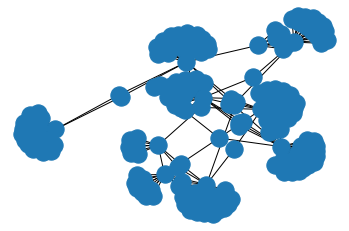

In [31]:
filename = 'bn-mouse_visual-cortex_2.edges'
G = nx.read_edgelist(filename)

nx.draw_networkx(G, with_labels=False)
plt.axis('off')
plt.show()

In [32]:
G = rinomina(G0)

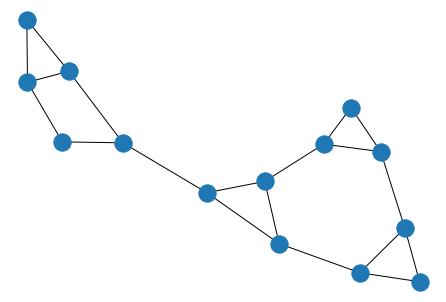

In [91]:
G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4), (4, 5), (5, 6), (4, 6),
                   (6, 8), (7, 8), (7, 9), (8, 9), (3, 7), (5, 14), (14, 10),
                   (14, 13), (10, 11), (11, 12), (10, 12), (12, 13)])
nx.draw(G0)

G = rinomina(G0)

In [32]:
def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    return len(set(iterator)) <= 1

In [33]:
def frattale(G, motif):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    #ris = identify(motif, G)
    liv = 0
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
            
        ris = identify(motif, G)
        print(nodi, "\n\n", ris, "\n\n")
        for i in ris:
            print(i, all_equal(i))
            if all_equal(i) == True:
                mapping = zippa(ris, nodi)
                G = nx.relabel_nodes(G, mapping)
                print(mapping)
            ris = ris[1:]
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv+=1
            print(n)
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res



In [34]:
risultato = frattale(G2, motif)

[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '

TypeError: 'NoneType' object is not callable

In [29]:
risultato = frattale(G, motif)

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[(0, (0, '1')), (0, (0, '12')), (0, (0, '4'))] True
[[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), 

In [37]:
res = frattale(G2, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '

TypeError: 'NoneType' object is not callable

In [38]:
nodi

[]

In [39]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

In [20]:
risultato

NameError: name 'risultato' is not defined

In [ ]:
    if ris == []:
            print("fine")
            return
    while all_equal(ris[0]) == True:
        
        if all_equal(ris[0]) == False:
            #print("AOOOOO")
            ris = ris[1:]
            
        else: #if all_equal(ris[0]) == True:
            print(ris[0], all_equal(ris[0]))
            #if all_equal(ris[0]) == True:
                
            
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]                
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1
            #print(liv)
            
            """
    ris = identify(motif, G)
    print("\n\n", nodi, "\n\n", ris, "\n\n")
    for i in ris:
        print(i, all_equal(i))
        if all_equal(i) == True:
            print("yee")
            mapping = zippa(ris, nodi)
            G = nx.relabel_nodes(G, mapping)
            print(mapping)
        ris = ris[1:]
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
        print(n)"""
    
    #return ris
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res
risultato = frattale(G, motif)

In [35]:
res = risultato

NameError: name 'risultato' is not defined

In [21]:
res = frattale(G, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

TypeError: 'NoneType' object is not callable

In [56]:
nodi

[[(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14)],
 [(1, 1), (1, 4), (1, 7), (1, 10), (0, 13), (0, 14)]]

[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 7)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6)), ((0, 5), (0, 14)), ((0, 6), (0, 8)), ((0, 8), (0, 7)), ((0, 8), (0, 9)), ((0, 7), (0, 9)), ((0, 14), (0, 10)), ((0, 14), (0, 13)), ((0, 10), (0, 11)), ((0, 10), (0, 12)), ((0, 13), (0, 12)), ((0, 11), (0, 12))]


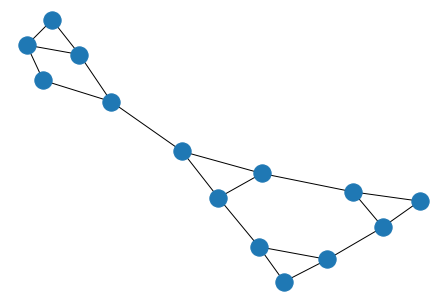

[((1, 1), (1, 1)), ((1, 1), (1, 4)), ((1, 1), (1, 7)), ((1, 4), (1, 4)), ((1, 4), (0, 14)), ((1, 4), (1, 7)), ((1, 7), (1, 7)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


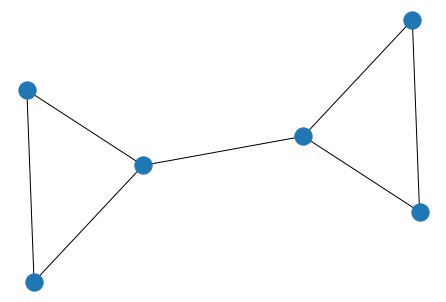

[((2, 1), (2, 1)), ((2, 1), (0, 14)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


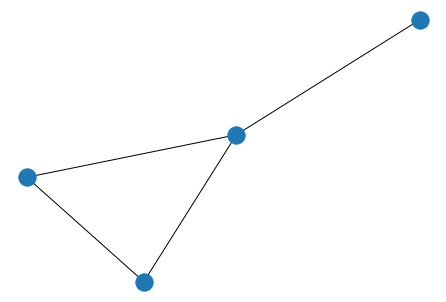

In [134]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---
### Memorizza merge
[torna su](#Indice)

Memorizza merge, per poter ricostruire inversamente

Ora funziona con il primo mapping, da rendere iterabile

In [113]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [114]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [115]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, 1): [(0, 1), (0, 7), (0, 8)]}

***

### Indici
[torna su](#Indice)

**Nodi compressi e nodi mantenuti, count e %**

In [116]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(4, 50.0, 4, 50.0)

#### Statistiche per livello

In [117]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  8 
Nodi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] 
Archi:  [((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))] 


Livello:  1 
# nodi:  4 
Nodi:  [(1, 1), (1, 2), (0, 3), (0, 6)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))] 


